In [1]:
#import kaggle as kg
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
os.environ["USERNAME"] = "aimlrl"
os.environ["KEY"] = "f9fcb3d12c2c4845724a50f0cdeab5ea"

In [3]:
#kg.api.authenticate()

In [ ]:
"""kg.api.dataset_download_files(dataset="ehtishamsadiq/uncleaned-laptop-price-dataset",
                              path="./dataset",unzip=True)"""

In [2]:
data = pd.read_csv("dataset/laptopData.csv")

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.drop(labels=data.columns[0],axis=1,inplace=True)

In [7]:
def label_encode_column(column_name):

    data[column_name].unique()

    d = dict()
    for value in data[column_name].unique():
        d[value] = data[data[column_name] == value][data.columns[-1]].mean()

    input_target_df = pd.DataFrame(data={column_name:d.keys(),"Mean Price":d.values()})
    input_target_df.sort_values(by="Mean Price",inplace=True)
    input_target_df.reset_index(inplace=True,drop=True)

    data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),
                              value=list(input_target_df.index)).infer_objects(copy=False)
    
    return dict(zip(list(input_target_df[column_name]),list(input_target_df.index)))

In [8]:
categorical_columns = list(data.columns[0:2]) + list(data.columns[3:5]) + list(data.columns[6:9])

In [9]:
columns_label_encodings = dict()

for column_name in categorical_columns:

    label_encoding_dict = label_encode_column(column_name)
    columns_label_encodings[column_name] = label_encoding_dict

/tmp/ipykernel_865/3511589036.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),


In [10]:
with open("columns_label_encodings.pkl","wb") as file_handle:
    pickle.dump(columns_label_encodings,file_handle)

In [11]:
data["Ram"] = data["Ram"].apply(lambda x: float(x.split("GB")[0]))

(array([397., 280., 125., 111.,  94.,  79.,  68.,  38.,  49.,  32.]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <BarContainer object of 10 artists>)

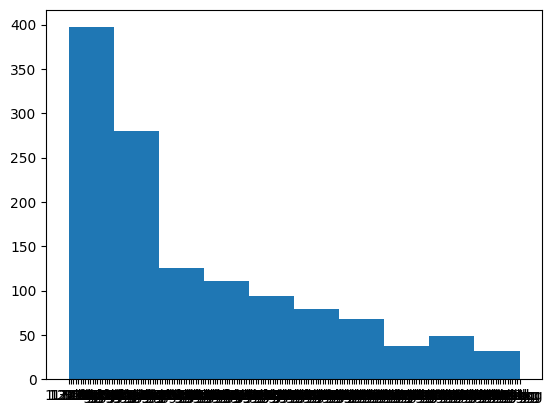

In [12]:
plt.hist(data["Weight"])

In [13]:
data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_865/322094499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],


In [14]:
data["Weight"] = data["Weight"].apply(lambda x: float(x.split("kg")[0]))

In [15]:
data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_865/3364775625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],


In [16]:
data["Inches"] = data["Inches"].astype("float64")

In [17]:
data.drop_duplicates(inplace=True,ignore_index=True)

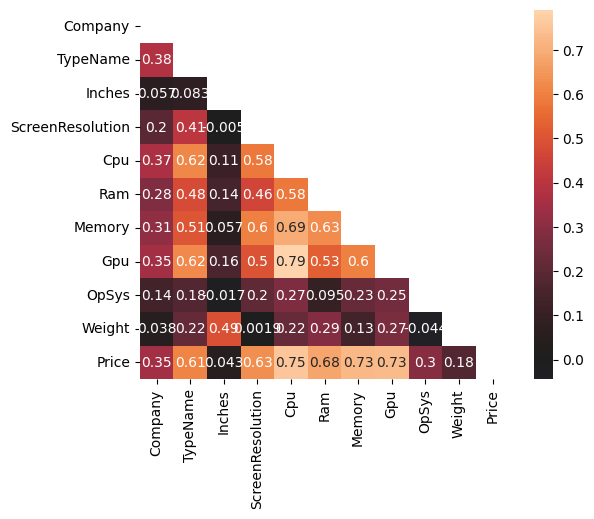

In [18]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [19]:
selected_features = list(data_corr[data_corr[data.columns[-1]] > 0.5].index)

In [20]:
refined_data = data[selected_features]

In [21]:
refined_data

,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,Price
0,3,26,85,8.0,14,80,71378.6832
1,3,13,64,8.0,13,45,47895.5232
2,1,15,58,8.0,21,54,30636.0000
3,3,36,111,16.0,31,95,135195.3360
4,3,26,99,8.0,21,84,96095.8080
...,...,...,...,...,...,...,...
1239,1,4,77,4.0,9,29,38378.6496
1240,2,16,77,4.0,14,47,33992.6400
1241,2,22,77,16.0,31,47,79866.7200
1242,1,4,16,2.0,6,6,12201.1200


In [22]:
X_transpose = np.array(refined_data.iloc[:,0:6])
y = np.array(refined_data.iloc[:,-1]).reshape(refined_data.shape[0],1)

In [23]:
def engineered_feaures(X_transpose,features_degree,is_only_interaction):

    nth_degree_feature_engineer = PolynomialFeatures(degree=features_degree,interaction_only=is_only_interaction)
    X_transpose_engineered = nth_degree_feature_engineer.fit_transform(X_transpose)

    return X_transpose_engineered

In [24]:
def normalize_data(X_transpose):

    zero_mean_one_std_scaler = StandardScaler()
    X_bar_transpose = zero_mean_one_std_scaler.fit_transform(X_transpose)

    return X_bar_transpose

In [25]:
def train_cv_test_split(X_transpose, y, train_frac, cv_frac):

    X_train_transpose = X_transpose[0:int(train_frac*X_transpose.shape[0])]
    y_train = y[0:int(train_frac*y.shape[0])]

    X_cv_transpose = X_transpose[int(train_frac*X_transpose.shape[0]):int((train_frac+cv_frac)*X_transpose.shape[0])]
    y_cv = y[int(train_frac*y.shape[0]):int(train_frac+cv_frac*y.shape[0])]

    X_test_transpose = X_transpose[int((train_frac+cv_frac)*X_transpose.shape[0]):]
    y_test = y[int((train_frac+cv_frac)*y.shape[0]):]

    return (X_train_transpose,y_train), (X_cv_transpose,y_cv), (X_test_transpose,y_test)

(array([438., 435., 225.,  95.,  36.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

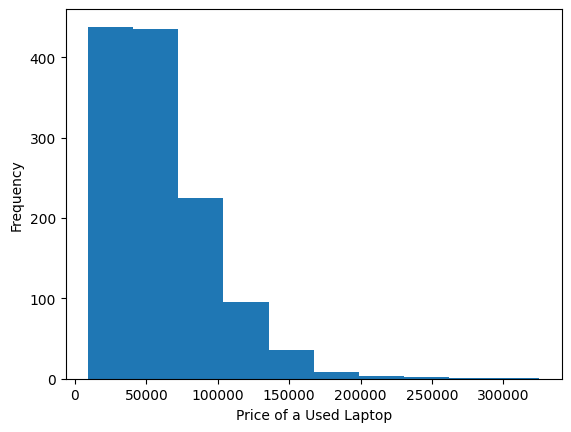

In [26]:
plt.xlabel("Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(y)

/tmp/ipykernel_865/4126059115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,fit=s.norm)


<Axes: xlabel='Price of a Used Laptop', ylabel='Density'>

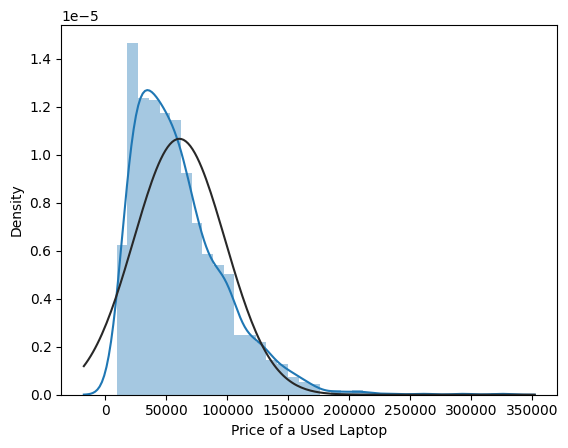

In [27]:
plt.xlabel("Price of a Used Laptop")
sns.distplot(y,fit=s.norm)

(array([ 14.,  72., 142., 178., 249., 263., 208.,  97.,  17.,   4.]),
 array([ 9.13461633,  9.49029881,  9.84598129, 10.20166377, 10.55734625,
        10.91302873, 11.26871121, 11.62439369, 11.98007617, 12.33575865,
        12.69144113]),
 <BarContainer object of 10 artists>)

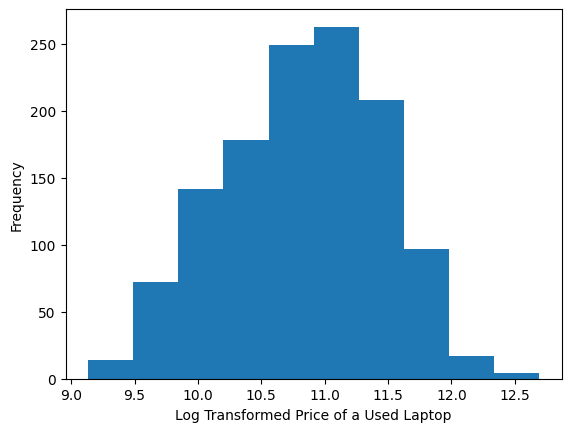

In [28]:
plt.xlabel("Log Transformed Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(np.log(y))

/tmp/ipykernel_865/428199229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y),fit=s.norm)


<Axes: xlabel='Log Transformed Price of a Used Laptop', ylabel='Density'>

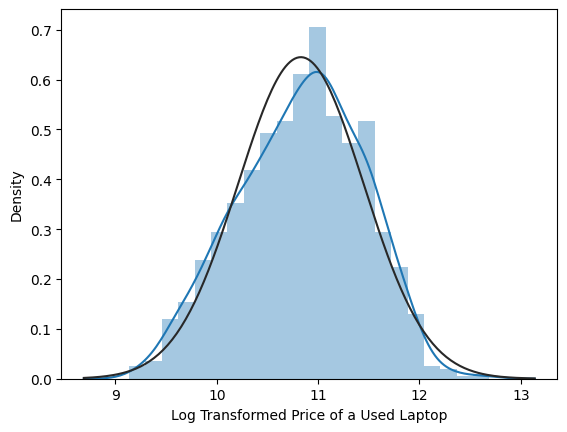

In [29]:
plt.xlabel("Log Transformed Price of a Used Laptop")
sns.distplot(np.log(y),fit=s.norm)

In [30]:
def 
y = np.log(y)

In [31]:
X_transpose_engineered = engineered_feaures(X_transpose,2,False)
X_bar_transpose = normalize_data(X_transpose_engineered)
(X_train_transpose,y_train), (X_cv_transpose,y_cv), (X_test_transpose,y_test) = train_cv_test_split(X_bar_transpose,y,0.7,0.2)

In [32]:
def mse(theta0,theta):

    return np.mean((y_train - (theta0 + np.matmul(X_train_transpose,theta)))**2)

In [33]:
def del_mse_by_del_theta(theta0,theta):

    error_transpose = np.transpose((theta0 + np.matmul(X_train_transpose,theta) - y_train))

    del_by_del_theta0 = np.mean(error_transpose)
    del_by_del_theta = (1/y_train.shape[0])*np.transpose(np.matmul(error_transpose,X_train_transpose))

    return [del_by_del_theta0,del_by_del_theta]

In [35]:
def training(epsilon=10**(-4),epoch_counter=0,theta0_initial=0,
             theta_initial = np.zeros((X_train_transpose.shape[1],1)),tol=10**(-5)):

    while True:

        initial_gradients = del_mse_by_del_theta(theta0_initial,theta_initial)

        theta0_final = theta0_initial - (epsilon * initial_gradients[0])
        theta_final = theta_initial - (epsilon * initial_gradients[1])

        mse_initial_value = mse(theta0_initial,theta_initial)
        mse_final_value = mse(theta0_final,theta_final)

        if abs(mse_initial_value - mse_final_value) < tol:
            break

        epoch_counter += 1

        theta0_initial = theta0_final
        theta_initial = theta_final

        print("Epoch # {}, MSE Value = {}".format(epoch_counter,mse_initial_value))

    return [theta0_final,theta_final]

In [36]:
def save_model(params,file_name="saved_model.pkl"):

    pickle.dump(obj=params,file=file_name)

In [37]:
def load_model(file_name="saved_model.pkl"):

    with open(file_name,"rb") as file_handle:
        params = pickle.load(file_handle)

    return params